# Linear Regression

This notebook contains the Programming Exercise 1 of the Andrew Ng's course on Coursera.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Linear Regression with one variable
In this first part we are asked to implement 'Linear regression with one variable' to predict profits of a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

In [2]:
# load data
import os
data = pd.read_csv(os.getcwd() + '/ex1data1.txt', header=None, names=['Population', 'Profit'])

### Explore data

In [3]:
data.head()

Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233

In [4]:
data.describe()

Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009471518>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000927AB70>]], dtype=object)

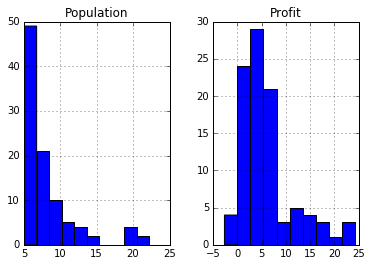

In [5]:
data.hist()

Both Population and Profit have a multiplying factor of 10.000

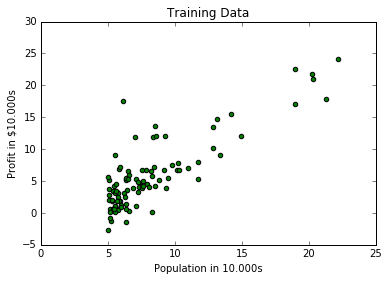

In [6]:
# scatter plot of the data (using plot function from pandas)
axes = data.plot(kind='scatter', 
             x='Population', y='Profit', 
             figsize=(6,4), 
             title='Training Data', 
             color='green')
axes.set_xlabel("Population in 10.000s")
axes.set_ylabel("Profit in $10.000s")

### Compute Univariate Linear Regression using Gradient Descent

In [7]:
# add a column of '1' to the training set in order to use a vectorized solution
data.insert(0, 'Ones', 1)
data.head()

Ones  Population   Profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233

In [8]:
# set X (training data) and y (target)
numCols = data.shape[1]
Xdf = data.iloc[:,0:numCols-1] # all columns except last (iloc allows for an integer-location based indexing)
ydf = data.iloc[:,numCols-1:numCols] # only last column

In [9]:
Xdf.head()

Ones  Population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598

In [10]:
ydf.head()

Profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233

In [11]:
# convert X,y,theta to np matrices to speed up calculus
X = np.matrix(Xdf.values)
y = np.matrix(ydf.values)
thetaStart = np.matrix(np.array([0,0],dtype=np.float)) # initilaized to (0,0)
print(X.shape, thetaStart.shape, y.shape)

((97L, 2L), (1L, 2L), (97L, 1L))


In [12]:
# function to compute h(x)
def h(X, theta):
    return X*theta.T

# function to compute the cost of the entire set as (1/2m)SUM((X·theta'-y)^2)
# X: mx2 matrix | theta: 1x2 vector | y: mx1 vector
def computeSetCost(X, y, theta):
    insides = np.power(h(X, theta) - y, 2) # vector with all insides values
    return np.sum(insides)/(2*len(X))

In [13]:
# Compute the cost of the initial solution
computeSetCost(X, y, thetaStart)

32.072733877455676

In [14]:
# gradient descent algorithm
def gradientDescent(X, y, thetaStart, alpha, iterations):        
    # init stuff
    m = len(y)
    theta = thetaStart # theta values that evolve
    thetaTmp = theta # aux to simultaneuosly update theta
    costPerIteration = [] # to track cost evolution
    
    # compute initial cost and track init state
    costPerIteration.append(computeSetCost(X, y, thetaStart))

    # iterate over num of iterations
    for i in range(iterations):        
        # simultaneously update theta values
        for j in range(theta.shape[1]):
            thetaTmp[0,j] = theta[0,j] - (alpha/m)*np.sum( np.multiply(h(X,theta)-y,X[:,j]) )
        theta = thetaTmp
        
        # track evolution
        costPerIteration.append(computeSetCost(X, y, theta))
   
    return theta, costPerIteration

In [15]:
# run gradient descent
alpha = 0.01
iterations = 1000
theta = np.matrix(np.array([0,0],dtype=np.float)) # initilaized to (0,0)
thetaFinal, costs = gradientDescent(X, y, thetaStart, alpha, iterations)
print(thetaFinal)
print(computeSetCost(X,y,thetaFinal))

[[-3.25088222  1.12836314]]
4.51483333995


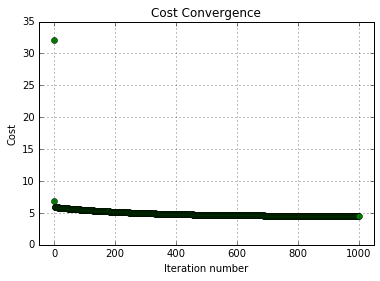

In [16]:
# Plot convergence of cost function
def plotCostConvergence(costs):
    plt.figure(figsize=(6,4))
    plt.plot(range(len(costs)),costs,'go')
    plt.grid(True)
    plt.title("Cost Convergence")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost")
    plt.xlim([-0.05*iterations,1.05*iterations])

plotCostConvergence(costs)

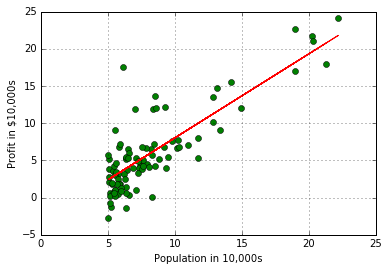

In [17]:
# Plot the regression line
def plotRegressionLine(X,y,theta):
    plt.figure(figsize=(6,4))
    plt.plot(X[:,1], y, 'go')
    plt.plot(X[:,1], theta[0,0] + theta[0,1]*X[:,1], 'r-')
    plt.grid(True)
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population in 10,000s')
    plt.xlim([0,25])
plotRegressionLine(X,y,thetaFinal)

[[-3.24139043  1.12730477]]
4.51595676547


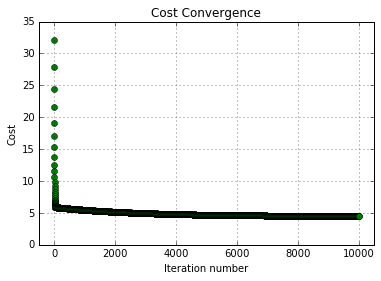

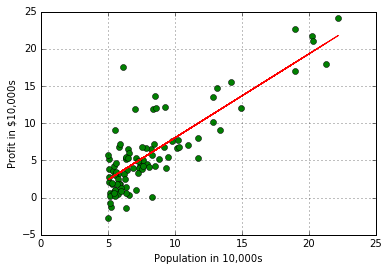

In [18]:
# Explore value of alpha
alpha = 0.001
iterations = 10000
theta = np.matrix(np.array([0,0],dtype=np.float)) # initilaized to (0,0)
thetaFinal, costs = gradientDescent(X, y, theta, alpha, iterations)
print(thetaFinal)
print(computeSetCost(X,y,thetaFinal))
plotCostConvergence(costs)
plotRegressionLine(X,y,thetaFinal)

### 3D plot of cost fucntion J

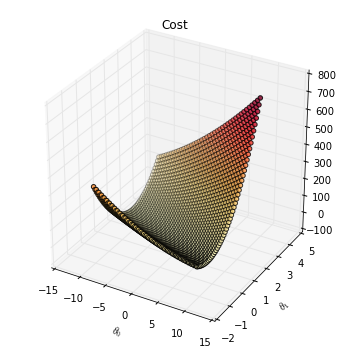

In [19]:
# based on: https://github.com/kaleko/CourseraML/blob/master/ex1/ex1.ipynb

# import necessary for 3D
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

# init plot
fig = plt.figure(figsize=(6,6))
ax = fig.gca(projection='3d')

# compute values
xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for xi in xvals:
    for yi in yvals:
        myxs.append(xi)
        myys.append(yi)
        myzs.append(computeSetCost(X,y,np.array([[xi], [yi]]).T))

# plot as scatter
ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd'))
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Cost')
plt.show()

In [20]:
### TODO: CONTOUR PLOT ###

# Linear Regression with SciKit-Learn

In [21]:
# import linear model from scikit
from sklearn import linear_model
model = linear_model.LinearRegression()

In [22]:
# fit the training data
model.fit(Xdf, ydf)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

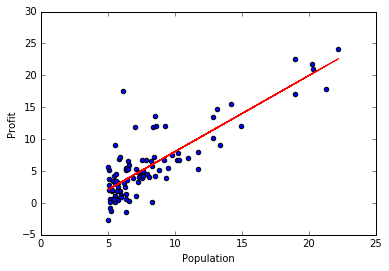

In [23]:
# plot regression line
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(Xdf['Population'], ydf)
ax.plot(Xdf['Population'], model.predict(Xdf), 'r')
ax.set_xlabel('Population')
ax.set_ylabel('Profit')

## Linear Regression of Multiple Variables
In the second part of the exercise we are asked to apply Linear Regression with Multiple Variables to predict the price of houses based on the size and number of bedrooms. 

In [24]:
# load data
import os
data2 = pd.read_csv(os.getcwd() + '/ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900

In [25]:
data2.describe()

Size   Bedrooms          Price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BEE4358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C0E6A20>]], dtype=object)

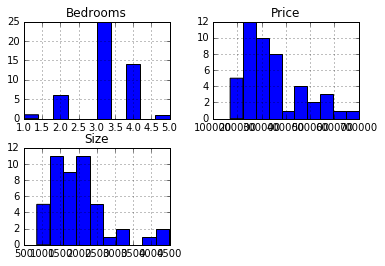

In [26]:
data2.hist()

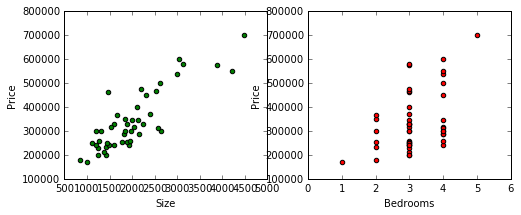

In [27]:
# scatter plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3),)
data2.plot(kind='scatter', 
           x='Size', y='Price', 
           color='green',
           ax=axes[0])
data2.plot(kind='scatter', 
           x='Bedrooms', y='Price',  
           color='red',
           ax=axes[1])

### Feature Normalization
x = x-mean / stdDev

In [28]:
# Feature Normalization: x-mu/sigma
originalMean = data2.mean()
originalStdDev = data2.std()
data2norm = (data2 - data2.mean()) / data2.std()
data2norm.head()

Size  Bedrooms     Price
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DB67630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E034BE0>]], dtype=object)

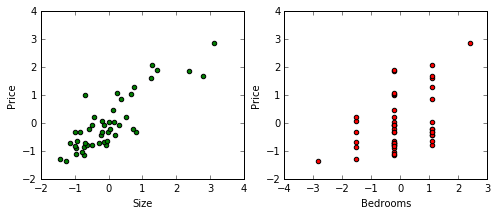

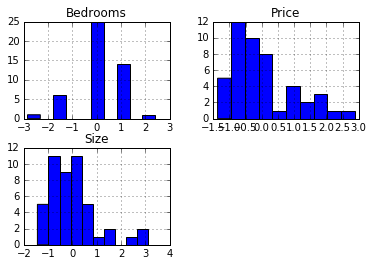

In [29]:
# explore normalized data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3),)
data2norm.plot(kind='scatter', 
           x='Size', y='Price', 
           color='green',
           ax=axes[0])
data2norm.plot(kind='scatter', 
           x='Bedrooms', y='Price',  
           color='red',
           ax=axes[1])
data2norm.hist()

### Gradient Descent

In [30]:
# add 'ones' column
data2norm.insert(0, 'Ones', 1) 

# set X (training data) and y (target)
numCols = data2norm.shape[1]
X2df = data2norm.iloc[:,0:numCols-1] # all columns except last (iloc allows for an integer-location based indexing)
y2df = data2norm.iloc[:,numCols-1:numCols] # only last column

# convert X,y,theta to np matrices to speed up calculus
X2 = np.matrix(X2df.values)
y2 = np.matrix(y2df.values)
theta2 = np.matrix(np.array([0,0,0],dtype=np.float)) # initilaized to (0,0)
print(X2.shape, theta2.shape, y2.shape)

((47L, 3L), (1L, 3L), (47L, 1L))


[[ -1.10006567e-16   8.78592062e-01  -4.70184194e-02]]
0.130702860684


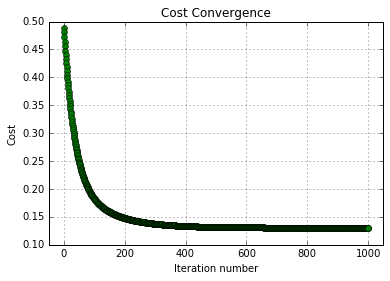

In [31]:
# compute linear regression
alpha = 0.01
iterations = 1000
thetaFinal2, costs2 = gradientDescent(X2, y2, theta2, alpha, iterations)
print(thetaFinal2)
print(computeSetCost(X2,y2,thetaFinal2))
plotCostConvergence(costs2)

### What is price of house with 1650 square feet and 3 bedrooms?

In [32]:
# scale test features and add 'one'
ytest = np.matrix(np.array([1.,
                            (1650.-originalMean['Size'])/originalStdDev['Size'],
                            (3.-originalMean['Bedrooms'])/originalStdDev['Bedrooms']
                           ]))

# scale back price
print("$%0.2f" % (np.dot(ytest,thetaFinal2.T)*originalStdDev['Price']+originalMean['Price'])[0] )

$293249.83
